In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import readpng as rpng


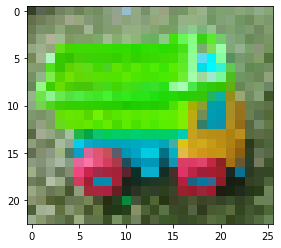

In [2]:
timg,rgbvec,I_init,gall,dRGB=rpng.toycar()
fig=plt.figure()
plt.imshow(timg)

In [3]:
from cumodule_glassoL2 import *

In [4]:
yR = mfista_func(I_init, dRGB, gall, lambda_gl= 1e4, lambda_tik =1e0, print_func=True)


Current iteration: 0/10000,  L: 1291299.381677, cost: 40057257206.897522, cost_chiquare:27997815.851115
Current iteration: 50/10000,  L: 1067189.571634, cost: 375125.361289, cost_chiquare:6485.736358
Current iteration: 100/10000,  L: 602400.691612, cost: 215109.340769, cost_chiquare:9013.762625
Current iteration: 150/10000,  L: 281024.368481, cost: 200256.360462, cost_chiquare:9887.617493
Current iteration: 200/10000,  L: 232251.544199, cost: 197845.493187, cost_chiquare:10141.497370
Current iteration: 250/10000,  L: 174494.022689, cost: 197147.158262, cost_chiquare:10275.370400
Current iteration: 300/10000,  L: 158630.929717, cost: 196762.847834, cost_chiquare:10318.070612
Current iteration: 350/10000,  L: 131099.941915, cost: 196483.177707, cost_chiquare:10397.494966
Current iteration: 400/10000,  L: 81402.749387, cost: 196244.192506, cost_chiquare:10410.369710
Current iteration: 450/10000,  L: 174494.022689, cost: 196228.720448, cost_chiquare:10333.830513
Current iteration: 500/1000

In [12]:
crit=1.e-2
mask=np.sum(yR[:,:,:],axis=(0,1))>crit
ysel=yR[:,:,mask]
ypredrgb=np.einsum("cl,jkc->jkl",rgbvec[mask,:],ysel)
print(np.shape(ysel)[2],"/",np.shape(yR)[2])


6 / 100


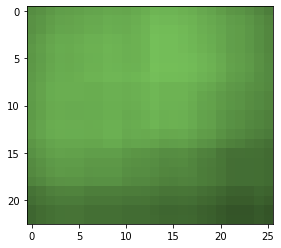

In [19]:
plt.imshow(ypredrgb)

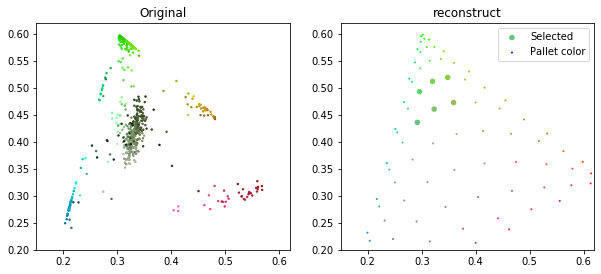

In [18]:
import viscolor as vc
vc.plotplane(timg,rgbvec,mask,"test.png")